In [276]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

Just like linear regression and k nearest neighbours, or any machine learning algorithms in scikit-learn, to do the modeling, we follow instantiate / fit / predict workflow.

There are other arguments in KMeans, such as method to initialize the centroids, stopping criteria, etc., yet we focus on the number of clusters, n_clusters, and allow other parameters to take the default values.

In [277]:
"""
Here we specify 3 clusters :
"""

from sklearn.cluster import KMeans

# instantiate the model
kmeans = KMeans(n_clusters=3)

# fit the model
kmeans.fit(X_scaled)

# make predictions
y_pred = kmeans.predict(X_scaled)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1])

In [278]:
pd.Series(y_pred).value_counts()

1    65
0    59
2    54
dtype: int64

In [279]:
pd.Series(y_pred).value_counts().sum()

178

There are 65 wines in cluster 0, 54 in cluster 1, and 59 in cluster 2.

In [280]:
#To inspect the coordinates of the three centroids:

print(kmeans.cluster_centers_)

[[-1.06183503  0.08414606]
 [ 0.92017418  0.87087204]
 [ 0.05253603 -1.14020926]]


In [281]:
X

,alcohol,total_phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80
...,...,...
173,13.71,1.68
174,13.40,1.80
175,13.27,1.59
176,13.17,1.65


In [282]:
X_scaled.shape

(178, 2)

In [283]:
X_scaled

array([[ 1.51861254,  0.80899739],
       [ 0.24628963,  0.56864766],
       [ 0.19687903,  0.80899739],
       [ 1.69154964,  2.49144552],
       [ 0.29570023,  0.80899739],
       [ 1.48155459,  1.56209322],
       [ 1.71625494,  0.32829793],
       [ 1.3086175 ,  0.48853108],
       [ 2.25977152,  0.80899739],
       [ 1.0615645 ,  1.09741707],
       [ 1.3580281 ,  1.04934713],
       [ 1.38273339, -0.15240153],
       [ 0.92568536,  0.48853108],
       [ 2.16095032,  1.28969686],
       [ 1.70390229,  1.61016317],
       [ 0.77745356,  0.88911397],
       [ 1.60508109,  0.80899739],
       [ 1.02450655,  1.04934713],
       [ 1.46920194,  1.61016317],
       [ 0.78980621,  0.64876424],
       [ 1.3086175 ,  1.1294637 ],
       [-0.08723191,  0.18408809],
       [ 0.87627476,  0.5045544 ],
       [-0.18605311,  0.2962513 ],
       [ 0.61686912,  0.37636788],
       [ 0.06099988,  0.53660103],
       [ 0.48098997,  0.88911397],
       [ 0.36981612,  0.16806478],
       [ 1.07391715,

A better way to see the results is to visualize them:

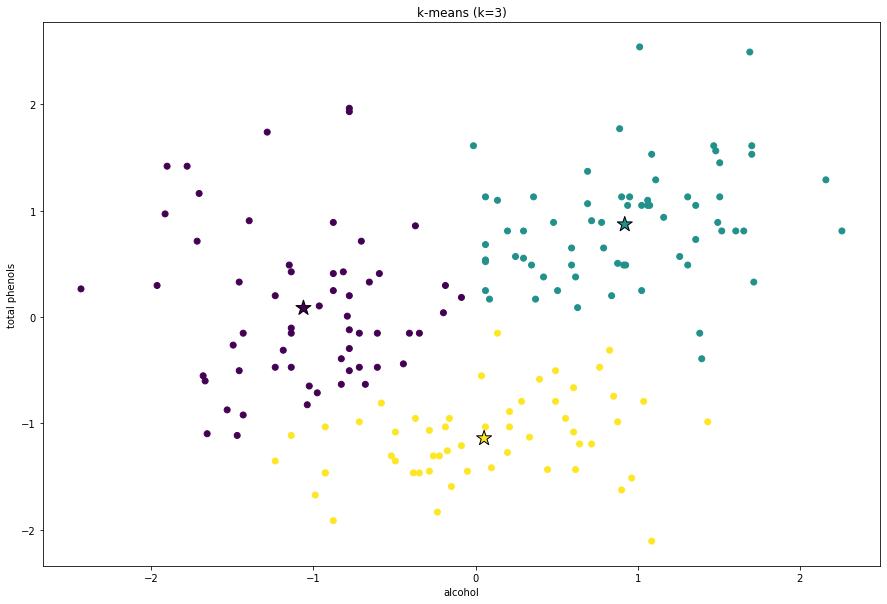

In [284]:
import matplotlib.pyplot as plt

# Create a figure and set the figsize
plt.figure(figsize=(15, 10))  # Adjust the width and height as desired

# plot the scaled data
plt.scatter(X_scaled[:,0],X_scaled[:,1],c= y_pred)#c is the color

# identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],marker="*",s = 250,c = [0,1,2],edgecolors='k')

plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()

The stars are the centroids. 
K-means divides wines into three groups: 
low alcohol but high total phenols , 
high alcohol and high total phenols , 
and low total phenols . 

For any new wine with the chemical report on alcohol and total phenols, 
we now can classify it based on its distance to each of the centroids. 
Suppose that there is new wine with alcohol at 13 and total phenols at 2.5, 
let’s predict which cluster the model will assign the new wine to.

First we need to put the new data into a 2d array:
X_new = np.array([[13, 2.5]])

Next, we need to standardize the new data:
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)
# [[-0.00076337  0.32829793]]

Now we are ready to predict the cluster:

In [285]:
X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)

print(X_new_scaled)
print(kmeans.predict(X_new_scaled))

[[-0.00076337  0.32829793]]
[1]


c:\Users\essam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Expect to get slightly different results every time you run the code as the order of the clusters might change.

One major shortcoming of k-means is that the random initial guess for the centroids can result in bad clustering, 
and k-means++ algorithm addresses this obstacle by specifying a procedure to initialize the centroids before proceeding with the standard k-means algorithm. 
In scikit-learn, the initialization mechanism is set to k-means++, by default.

----

Can we divide the wines into two subgroups?

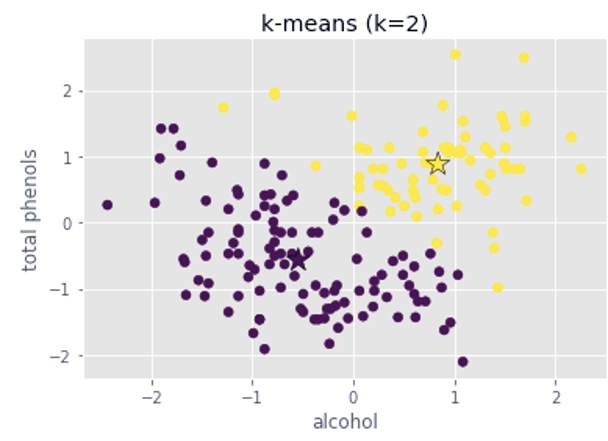

No problem, how about four?

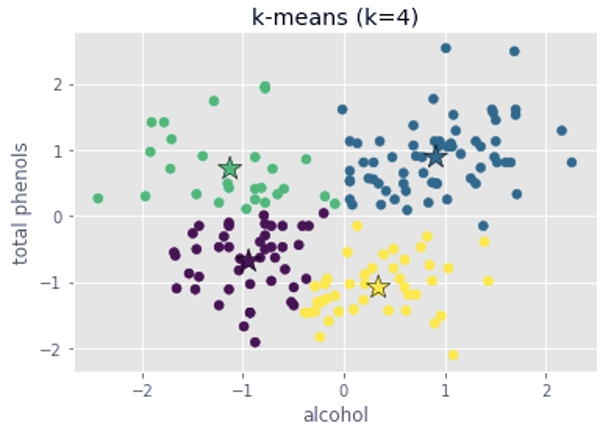

Sure! As shown, k-means will be happy to divide the dataset into any integer number of clusters, ranging from 1, an extreme case where all data points belong to one big cluster, to n, another extreme case where each data point is its own cluster.

So which one should we choose, 2, or 3, or 4 for the wines?

Intuitively, 
k-means problem partitions n data points into k tight sets such that the data points are closer to each other 
than to the data points in the other clusters.

And the tightness can be measured as the sum of squares of the distance from data point to its nearest centroid, or inertia. 

In scikit-learn, it is stored as inertia_, e.g. when k = 2, 

the distortion (التشوه) is 185:

In [286]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

#Or when k is 3, the distortion decreases to 114.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

185.25081541190127
114.34674038310786


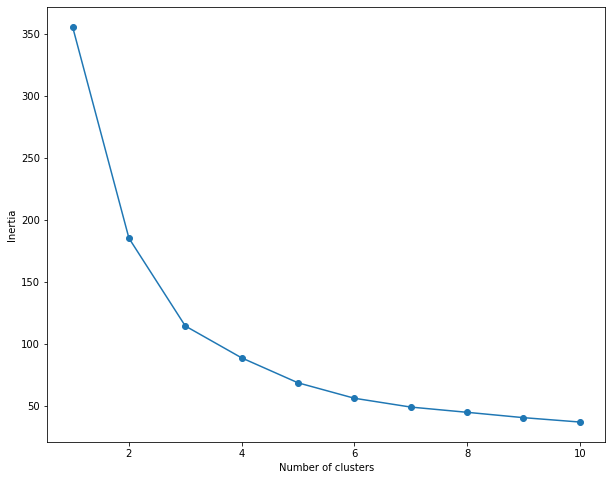

In [287]:
#We plot the inertia for different values of k:

# calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# plot
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As the plot shows, the inertia decreases as the number of clusters increases. 
The optimal k should be where the inertia no longer decreases as rapidly.

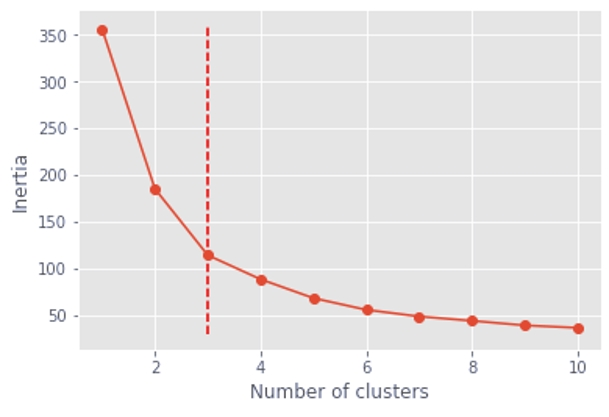

For example, k=3 seems to be optimal, 
as we increase the number of clusters from 3 to 4, 
the decrease in inertia slows down significantly, 
compared to that from 2 to 3. 

This approach is called elbow method (can you see why?). 
It is a useful graphical tool to estimate the optimal k in k-means.

*** One single inertia alone is not suitable to determine the optimal k because the larger k is, the lower the inertia will be.

#Modeling With More Features

Previously to build kmeans models, 
we used two (out of thirteen) features: 
alcohol and total phenols. 
The choice is random and it is easy to visualize the results. 
However, can we use more features, 
for example all of them? Why not? Let’s try it.

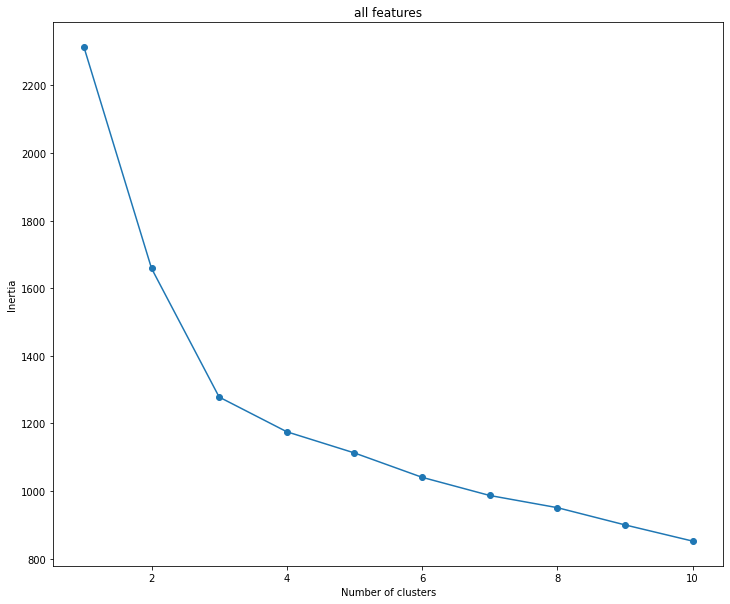

In [288]:
"""
Plot the inertia for a range of k to determine the optimal k via elbow method:
"""

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

# calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled) 
    inertia.append(km.inertia_)

plt.figure(figsize=(12, 10))
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("all features")
plt.show()

In [289]:
"""
Similarly we spot that the inertia no longer decreases as rapidly after k = 3. 
We then finalize the model by setting n_clusters = 3 and obtain the predictions.
"""

k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

print(y_pred)
print(pd.Series(y_pred).value_counts())

"""
Compared to the predictions using only two features, 
the two models produce very similar results. 
For instance, 
the first 21 wines are predicted to belong to the same cluster from both models, 
so are the last 19 wines. 
In fact, only 13 out of 178 wines were clustered differently by the two models.
"""

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1    65
2    62
0    51
dtype: int64


'\nCompared to the predictions using only two features, \nthe two models produce very similar results. \nFor instance, \nthe first 21 wines are predicted to belong to the same cluster from both models, \nso are the last 19 wines. \nIn fact, only 13 out of 178 wines were clustered differently by the two models.\n'

It is natural to ask, which model is better? 

Recall that clustering is an unsupervised learning method, 
which indicates that we don’t know the ground truth of the labels. 
Thus it is difficult, if not impossible, to determine that the model with 2 features is more accurate in grouping wines than the one with all 13 features, or vice versa.

Which model, in other words which features, should you choose is often determined by external information. 
For example, 
the marketing department wants to know if a continent-specific strategy is needed to sell these wines. 
We now have access to consumers' demographic information 
and the three clusters identified from model A correspond better to customers in Europe, Asia, and North America respectively than model B; 
then model A is the winner. 
It is an oversimplified example, but you get the gist.

*** In practice, the features are often chosen by the collaboration between data scientists and domain knowledge experts.